1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [5]:
from math import sqrt, pi
import numpy as np
from scipy import stats

x0 = 15
mu = 6.3
sigma = np.sqrt(mu)
Z = abs(x0 - mu) / sigma
print("Z =", Z)

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

prob = 1. - stats.poisson.cdf(x0,mu)
print('Probability to observe 15 or more hurricanes',prob)
print('Since p-value is smaller than alpha, we reject the null hypothesis')

Z = 3.4661629670697414
p-value = 0.0005279431738299246
Probability to observe 15 or more hurricanes 0.0008444930803583883
Since p-value is smaller than alpha, we reject the null hypothesis


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [8]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

pre_sigma = np.sqrt(np.var(pre, ddof=1))
post_sigma = np.sqrt(np.var(post, ddof=1))

pre_mean = np.mean(pre)
post_mean = np.mean(post)

sigma = np.sqrt((pre_sigma**2+post_sigma**2)/2)
T = (pre_mean - post_mean)/(sigma*np.sqrt(2/n))
print('T:',T)

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("Since p-value < alpha/2 we reject the null hypothesis ")

T: -3.786997938137629
p-value = 0.004302464132864604
Since p-value < alpha/2 we reject the null hypothesis 


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequency of hares: 0.09523809523809523
Peak frequency of lynxes: 0.09523809523809523
The period of hares poulation in years  is:  10.5
The period of lynxes poulation in years  is:  10.5


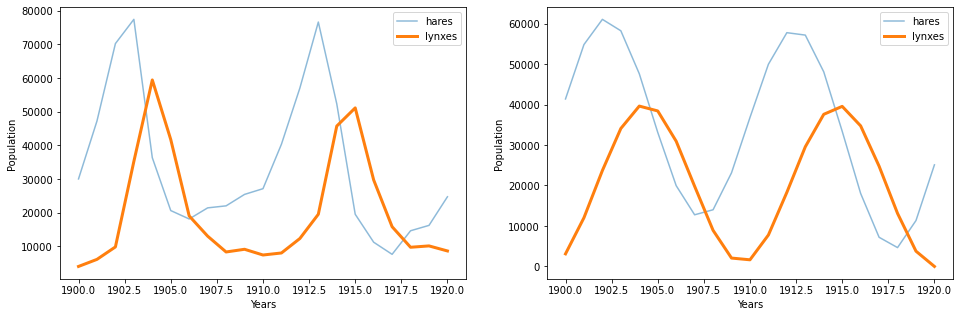

In [13]:
from scipy import fftpack
import matplotlib.pyplot as plt

years, hares, lynxes, carrots = np.loadtxt('populations.txt',unpack = True)

sample_freq = fftpack.fftfreq(years.size, d=1.0)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]

sig_hares_fft = fftpack.fft(hares)
power_hares = np.abs(sig_hares_fft)
powes_hares = power_hares[pos_mask]
peak_freq_hares = freqs[powes_hares.argmax()]
print("Peak frequency of hares:", peak_freq_hares)

sig_lynxes_fft = fftpack.fft(lynxes)
power_lynxes = np.abs(sig_lynxes_fft)
powes_lynxes = power_hares[pos_mask]
peak_freq_lynxes = freqs[powes_lynxes.argmax()]
print("Peak frequency of lynxes:", peak_freq_lynxes)

print('The period of hares poulation in years  is: ', 1. / peak_freq_hares)
print('The period of lynxes population in years  is: ', 1. / peak_freq_lynxes)

highfreq_hares_fft = sig_hares_fft.copy()
highfreq_lynxes_fft = sig_lynxes_fft.copy()
highfreq_hares_fft[np.abs(sample_freq) > peak_freq_hares] = 0
highfreq_lynxes_fft[np.abs(sample_freq) > peak_freq_lynxes] = 0
filtered_sig_hares = fftpack.ifft(highfreq_hares_fft)
filtered_sig_lynxes = fftpack.ifft(highfreq_lynxes_fft)
real_filtered_signal_hares = np.real(filtered_sig_hares)
real_filtered_signal_lynxes = np.real(filtered_sig_lynxes)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax1.plot(years, hares, alpha=0.5, label='hares')
ax1.plot(years, lynxes, linewidth=3, label='lynxes')
ax1.set_xlabel('Years')
ax1.set_ylabel('Population')
ax1.legend(loc='best')

ax2.plot(years, real_filtered_signal_hares, alpha=0.5, label='hares')
ax2.plot(years, real_filtered_signal_lynxes, linewidth=3, label='lynxes')
ax2.set_xlabel('Years')
ax2.set_ylabel('Population')
ax2.legend(loc='best')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Reconstructed Image')

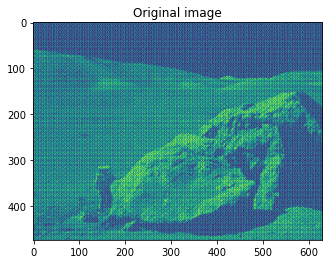

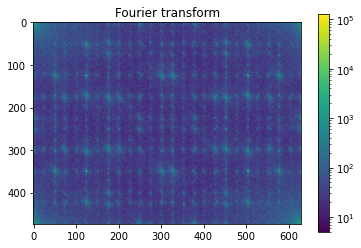

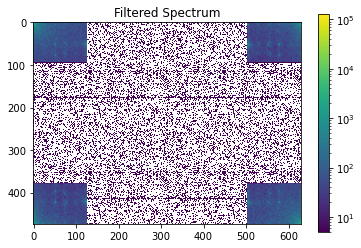

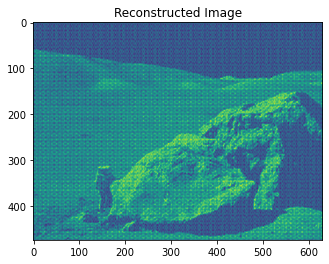

In [30]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('moonlanding.png').astype(float)

plt.figure()
plt.imshow(im)
plt.title('Original image')

from scipy import fftpack
fft_im = fftpack.fft2(im)


def plot_spectrum(fft_im):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(fft_im), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(fft_im)
plt.title('Fourier transform')

#we apply a low pass filter
filter = 0.2
fft2_im = fft_im.copy()

#r and c are the number of rows and columns of the array
r, c = fft2_im.shape

#filter rows
fft2_im[int(r*filter):int(r*(1-filter))] = 0

#filter columns:
fft2_im[:, int(c*filter):int(c*(1-filter))] = 0

plt.figure()
plot_spectrum(fft2_im)
plt.title('Filtered Spectrum')

#inverse fourier transform to get the image back
new_im = fftpack.ifft2(fft2_im).real

plt.figure()
plt.imshow(new_im)
plt.title('Reconstructed Image')